# EDA Analysis and Machine Learning on UFO dataset
Made by: [Usman Bin Tariq](https://github.com/UsmanBinTariq98)\
Goal: We have a dataset of UFO Sightings in USA and Canada. We will perform some EDA on the dataset to find some interesting insights.\
Contents:
- [Importing the data](#Importing-the-Data)
- [Data Cleaning](#Cleaning-the-Data)
- [Data Visualization](#Data-Visualization)
- [Model Building](#Creating-Models)\
Data Source: [UFO Sights US and Canada](https://www.kaggle.com/datasets/utkarshx27/ufo-sights-2016-us-and-canada?resource=download)

# Importing the Data

In [49]:
# importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

In [50]:
# reading the dataset
df = pd.read_csv('UFO_dataset.csv', encoding='latin1')
df

,Date / Time,Country,City,State,Shape,Summary,lat,lng
0,12/21/16 19:15,USA,Waynesboro,VA,Sphere,Bright round object hovering in sky.,38.065229,-78.905888
1,12/21/16 00:00,USA,Louisville,KY,Unknown,Multiple craft ascending from north of Shelbyv...,38.254238,-85.759407
2,12/20/16 22:30,USA,Santa Rosa,CA,Sphere,Bright orange planet-like object sighted near ...,38.440467,-122.714431
3,12/20/16 19:00,USA,Fresno,CA,Circle,Twelve orange globes in formation over Fresno,36.729529,-119.708861
4,12/19/16 21:53,USA,Reymert,AZ,Circle,"While camping in the Cottonwood canyon Rd., al...",33.229779,-111.209290
...,...,...,...,...,...,...,...,...
5172,2016-01-01 00.00.00,USA,Elk Grove,CA,Light,6-7 peach-colored craft moving easterly direct...,38.408799,-121.371618
5173,2016-01-01 00.00.00,USA,Anchorage,AK,Circle,New Years yellow objects.,61.216313,-149.894852
5174,2016-01-01 00.00.00,USA,Sodaville,OR,Sphere,Two balls of orange light seen above the trees...,44.483395,-122.869982
5175,2016-01-01 00.00.00,USA,Arnold,MO,Triangle,Triangle obj. moving W to SE from my position....,38.432832,-90.377619


In [51]:
df.shape

(5177, 8)

In [52]:
df.columns

Index(['Date / Time', 'Country', 'City', 'State', 'Shape', 'Summary', 'lat',
       'lng'],
      dtype='object')

In [53]:
df.dtypes

Date / Time     object
Country         object
City            object
State           object
Shape           object
Summary         object
lat            float64
lng            float64
dtype: object

In [54]:
df.describe()

,lat,lng
count,5177.000000,5177.000000
mean,38.594944,-94.892339
std,5.800210,18.442668
min,19.062767,-162.597762
25%,34.225728,-112.298280
50%,39.049011,-88.351460
75%,42.360816,-80.124767
max,66.898206,-60.087349


In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,5177.0,38.594944,5.800210,19.062767,34.225728,39.049011,42.360816,66.898206
lng,5177.0,-94.892339,18.442668,-162.597762,-112.298280,-88.351460,-80.124767,-60.087349


In [56]:
df.head()

,Date / Time,Country,City,State,Shape,Summary,lat,lng
0,12/21/16 19:15,USA,Waynesboro,VA,Sphere,Bright round object hovering in sky.,38.065229,-78.905888
1,12/21/16 00:00,USA,Louisville,KY,Unknown,Multiple craft ascending from north of Shelbyv...,38.254238,-85.759407
2,12/20/16 22:30,USA,Santa Rosa,CA,Sphere,Bright orange planet-like object sighted near ...,38.440467,-122.714431
3,12/20/16 19:00,USA,Fresno,CA,Circle,Twelve orange globes in formation over Fresno,36.729529,-119.708861
4,12/19/16 21:53,USA,Reymert,AZ,Circle,"While camping in the Cottonwood canyon Rd., al...",33.229779,-111.209290


# Cleaning the Data

In [57]:
# Changing the column name of datetime
df.rename(columns={'Date / Time': 'datetime'}, inplace=True)
df.head()

,datetime,Country,City,State,Shape,Summary,lat,lng
0,12/21/16 19:15,USA,Waynesboro,VA,Sphere,Bright round object hovering in sky.,38.065229,-78.905888
1,12/21/16 00:00,USA,Louisville,KY,Unknown,Multiple craft ascending from north of Shelbyv...,38.254238,-85.759407
2,12/20/16 22:30,USA,Santa Rosa,CA,Sphere,Bright orange planet-like object sighted near ...,38.440467,-122.714431
3,12/20/16 19:00,USA,Fresno,CA,Circle,Twelve orange globes in formation over Fresno,36.729529,-119.708861
4,12/19/16 21:53,USA,Reymert,AZ,Circle,"While camping in the Cottonwood canyon Rd., al...",33.229779,-111.209290


In [58]:
# Checking for null values
df.isnull().sum()

datetime    0
Country     0
City        0
State       0
Shape       0
Summary     0
lat         0
lng         0
dtype: int64

In [59]:
# Dropping the null rows
df.dropna(inplace=True)
df.isnull().sum()

datetime    0
Country     0
City        0
State       0
Shape       0
Summary     0
lat         0
lng         0
dtype: int64

In [60]:
# converting the datetime column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df.dtypes

datetime    datetime64[ns]
Country             object
City                object
State               object
Shape               object
Summary             object
lat                float64
lng                float64
dtype: object

In [61]:
# Extracting the year, month, day, hour, minute from datetime column
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df.head()


,datetime,Country,City,State,Shape,Summary,lat,lng,year,month,day,hour,minute
0,2016-12-21 19:15:00,USA,Waynesboro,VA,Sphere,Bright round object hovering in sky.,38.065229,-78.905888,2016.0,12.0,21.0,19.0,15.0
1,2016-12-21 00:00:00,USA,Louisville,KY,Unknown,Multiple craft ascending from north of Shelbyv...,38.254238,-85.759407,2016.0,12.0,21.0,0.0,0.0
2,2016-12-20 22:30:00,USA,Santa Rosa,CA,Sphere,Bright orange planet-like object sighted near ...,38.440467,-122.714431,2016.0,12.0,20.0,22.0,30.0
3,2016-12-20 19:00:00,USA,Fresno,CA,Circle,Twelve orange globes in formation over Fresno,36.729529,-119.708861,2016.0,12.0,20.0,19.0,0.0
4,2016-12-19 21:53:00,USA,Reymert,AZ,Circle,"While camping in the Cottonwood canyon Rd., al...",33.229779,-111.209290,2016.0,12.0,19.0,21.0,53.0


In [62]:
# Dropping the datetime column
df.drop('datetime', axis=1, inplace=True)
df.head()

,Country,City,State,Shape,Summary,lat,lng,year,month,day,hour,minute
0,USA,Waynesboro,VA,Sphere,Bright round object hovering in sky.,38.065229,-78.905888,2016.0,12.0,21.0,19.0,15.0
1,USA,Louisville,KY,Unknown,Multiple craft ascending from north of Shelbyv...,38.254238,-85.759407,2016.0,12.0,21.0,0.0,0.0
2,USA,Santa Rosa,CA,Sphere,Bright orange planet-like object sighted near ...,38.440467,-122.714431,2016.0,12.0,20.0,22.0,30.0
3,USA,Fresno,CA,Circle,Twelve orange globes in formation over Fresno,36.729529,-119.708861,2016.0,12.0,20.0,19.0,0.0
4,USA,Reymert,AZ,Circle,"While camping in the Cottonwood canyon Rd., al...",33.229779,-111.209290,2016.0,12.0,19.0,21.0,53.0


In [63]:
# moving the year, month, day, hour, minute columns to the front
df = df[['year', 'month', 'day', 'hour', 'minute', 'City','Shape', 'State', 'Country', 'Summary', 'lat', 'lng']]
df.head()

,year,month,day,hour,minute,City,Shape,State,Country,Summary,lat,lng
0,2016.0,12.0,21.0,19.0,15.0,Waynesboro,Sphere,VA,USA,Bright round object hovering in sky.,38.065229,-78.905888
1,2016.0,12.0,21.0,0.0,0.0,Louisville,Unknown,KY,USA,Multiple craft ascending from north of Shelbyv...,38.254238,-85.759407
2,2016.0,12.0,20.0,22.0,30.0,Santa Rosa,Sphere,CA,USA,Bright orange planet-like object sighted near ...,38.440467,-122.714431
3,2016.0,12.0,20.0,19.0,0.0,Fresno,Circle,CA,USA,Twelve orange globes in formation over Fresno,36.729529,-119.708861
4,2016.0,12.0,19.0,21.0,53.0,Reymert,Circle,AZ,USA,"While camping in the Cottonwood canyon Rd., al...",33.229779,-111.209290


In [64]:
df.dtypes

year       float64
month      float64
day        float64
hour       float64
minute     float64
City        object
Shape       object
State       object
Country     object
Summary     object
lat        float64
lng        float64
dtype: object

In [65]:
df.describe()

,year,month,day,hour,minute,lat,lng
count,2958.0,2958.000000,2958.000000,2958.000000,2958.000000,5177.000000,5177.000000
mean,2016.0,6.437458,21.701487,16.074375,20.536173,38.594944,-94.892339
std,0.0,3.150166,5.384424,7.393744,18.143937,5.800210,18.442668
min,2016.0,1.000000,13.000000,0.000000,0.000000,19.062767,-162.597762
25%,2016.0,4.000000,17.000000,12.000000,0.000000,34.225728,-112.298280
50%,2016.0,7.000000,22.000000,20.000000,20.000000,39.049011,-88.351460
75%,2016.0,9.000000,27.000000,21.000000,34.000000,42.360816,-80.124767
max,2016.0,12.000000,31.000000,23.000000,59.000000,66.898206,-60.087349


In [66]:
# deleting year columns
df.drop('year', axis=1, inplace=True)
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_28200\970448794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('year', axis=1, inplace=True)


,month,day,hour,minute,City,Shape,State,Country,Summary,lat,lng
0,12.0,21.0,19.0,15.0,Waynesboro,Sphere,VA,USA,Bright round object hovering in sky.,38.065229,-78.905888
1,12.0,21.0,0.0,0.0,Louisville,Unknown,KY,USA,Multiple craft ascending from north of Shelbyv...,38.254238,-85.759407
2,12.0,20.0,22.0,30.0,Santa Rosa,Sphere,CA,USA,Bright orange planet-like object sighted near ...,38.440467,-122.714431
3,12.0,20.0,19.0,0.0,Fresno,Circle,CA,USA,Twelve orange globes in formation over Fresno,36.729529,-119.708861
4,12.0,19.0,21.0,53.0,Reymert,Circle,AZ,USA,"While camping in the Cottonwood canyon Rd., al...",33.229779,-111.209290


In [67]:
# deleting minute columns
df.drop('minute', axis=1, inplace=True)
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_28200\2795336310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('minute', axis=1, inplace=True)


,month,day,hour,City,Shape,State,Country,Summary,lat,lng
0,12.0,21.0,19.0,Waynesboro,Sphere,VA,USA,Bright round object hovering in sky.,38.065229,-78.905888
1,12.0,21.0,0.0,Louisville,Unknown,KY,USA,Multiple craft ascending from north of Shelbyv...,38.254238,-85.759407
2,12.0,20.0,22.0,Santa Rosa,Sphere,CA,USA,Bright orange planet-like object sighted near ...,38.440467,-122.714431
3,12.0,20.0,19.0,Fresno,Circle,CA,USA,Twelve orange globes in formation over Fresno,36.729529,-119.708861
4,12.0,19.0,21.0,Reymert,Circle,AZ,USA,"While camping in the Cottonwood canyon Rd., al...",33.229779,-111.209290


In [68]:
df.tail()

,month,day,hour,City,Shape,State,Country,Summary,lat,lng
5172,NaN,NaN,NaN,Elk Grove,Light,CA,USA,6-7 peach-colored craft moving easterly direct...,38.408799,-121.371618
5173,NaN,NaN,NaN,Anchorage,Circle,AK,USA,New Years yellow objects.,61.216313,-149.894852
5174,NaN,NaN,NaN,Sodaville,Sphere,OR,USA,Two balls of orange light seen above the trees...,44.483395,-122.869982
5175,NaN,NaN,NaN,Arnold,Triangle,MO,USA,Triangle obj. moving W to SE from my position....,38.432832,-90.377619
5176,NaN,NaN,NaN,Vernon,Sphere,CT,USA,Red sphere in the sky.,36.092946,-80.149628


In [69]:
# finding null values
df.isnull().sum()

month      2219
day        2219
hour       2219
City          0
Shape         0
State         0
Country       0
Summary       0
lat           0
lng           0
dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    2958 non-null   float64
 1   day      2958 non-null   float64
 2   hour     2958 non-null   float64
 3   City     5177 non-null   object 
 4   Shape    5177 non-null   object 
 5   State    5177 non-null   object 
 6   Country  5177 non-null   object 
 7   Summary  5177 non-null   object 
 8   lat      5177 non-null   float64
 9   lng      5177 non-null   float64
dtypes: float64(5), object(5)
memory usage: 404.6+ KB


In [71]:
# removing null values
df.dropna(inplace=True)
df.isnull().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_28200\2525354611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


month      0
day        0
hour       0
City       0
Shape      0
State      0
Country    0
Summary    0
lat        0
lng        0
dtype: int64

In [72]:
# removing all the rows of Uknown in Shape column
df = df[df['Shape'] != 'Unknown']
df

,month,day,hour,City,Shape,State,Country,Summary,lat,lng
0,12.0,21.0,19.0,Waynesboro,Sphere,VA,USA,Bright round object hovering in sky.,38.065229,-78.905888
2,12.0,20.0,22.0,Santa Rosa,Sphere,CA,USA,Bright orange planet-like object sighted near ...,38.440467,-122.714431
3,12.0,20.0,19.0,Fresno,Circle,CA,USA,Twelve orange globes in formation over Fresno,36.729529,-119.708861
4,12.0,19.0,21.0,Reymert,Circle,AZ,USA,"While camping in the Cottonwood canyon Rd., al...",33.229779,-111.209290
5,12.0,19.0,21.0,Redding,Light,CA,USA,Stargazing I saw a star just appear then moves...,40.586356,-122.391675
...,...,...,...,...,...,...,...,...,...,...
4996,1.0,13.0,16.0,Phoenix,Other,AZ,USA,Sighting of small white orbs high over Phoenix.,33.448587,-112.077346
4997,1.0,13.0,13.0,Woodland Township,Light,NJ,USA,Bright light with flashing lights hovering ove...,39.842075,-74.523057
4998,1.0,13.0,6.0,Winter Park,Rectangle,FL,USA,Wide object (football field plus) with bright ...,28.600062,-81.342744
4999,1.0,13.0,6.0,Danville,Diamond,VA,USA,I turned onto my road from my drive way. As so...,36.585972,-79.395023


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2725 entries, 0 to 5000
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    2725 non-null   float64
 1   day      2725 non-null   float64
 2   hour     2725 non-null   float64
 3   City     2725 non-null   object 
 4   Shape    2725 non-null   object 
 5   State    2725 non-null   object 
 6   Country  2725 non-null   object 
 7   Summary  2725 non-null   object 
 8   lat      2725 non-null   float64
 9   lng      2725 non-null   float64
dtypes: float64(5), object(5)
memory usage: 234.2+ KB


<AxesSubplot:ylabel='lat'>

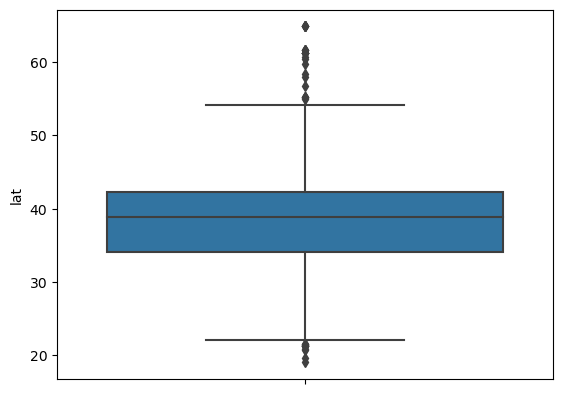

In [74]:
# checking outliers in lat column
sns.boxplot(y=df['lat'])

<AxesSubplot:ylabel='lng'>

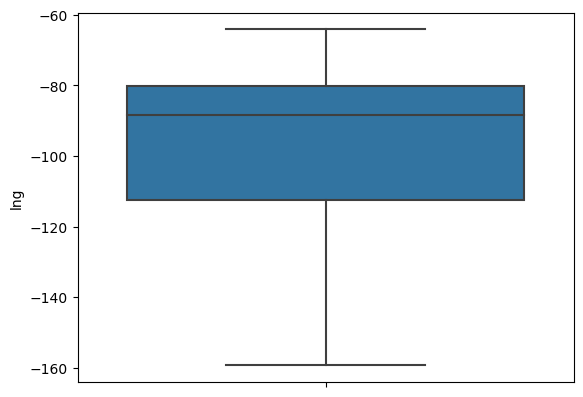

In [75]:
# checking outliers in lng column
sns.boxplot(y=df['lng'])

<AxesSubplot:ylabel='lat'>

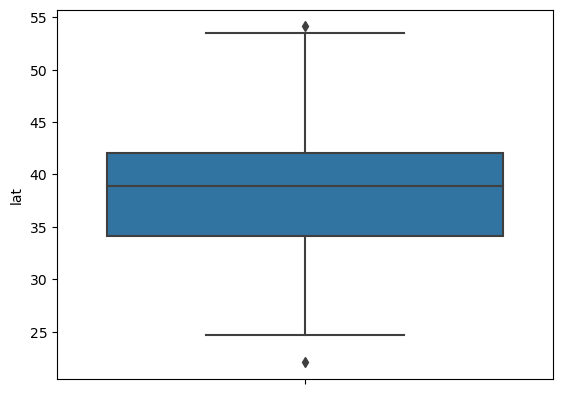

In [76]:
# removing outliers in lat column
q1 = df['lat'].quantile(0.25)
q3 = df['lat'].quantile(0.75)
iqr = q3-q1
df=df[(df['lat']>=q1-1.5*iqr) & (df['lat']<=q3+1.5*iqr)]
sns.boxplot(y=df['lat'])

## Data Visualization

<AxesSubplot:xlabel='month', ylabel='count'>

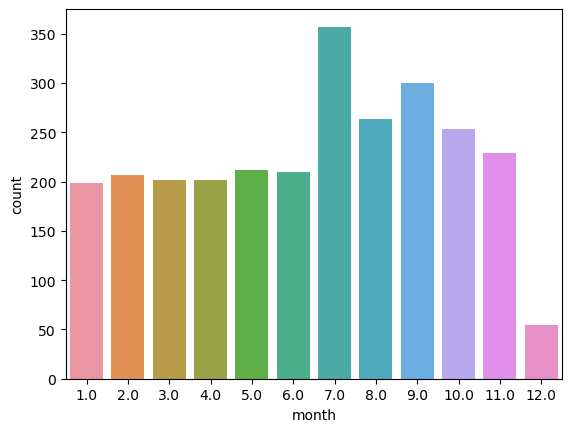

In [77]:
sns.countplot(x=df['month'])

In [78]:
df.columns

Index(['month', 'day', 'hour', 'City', 'Shape', 'State', 'Country', 'Summary',
       'lat', 'lng'],
      dtype='object')

<AxesSubplot:xlabel='Country', ylabel='count'>

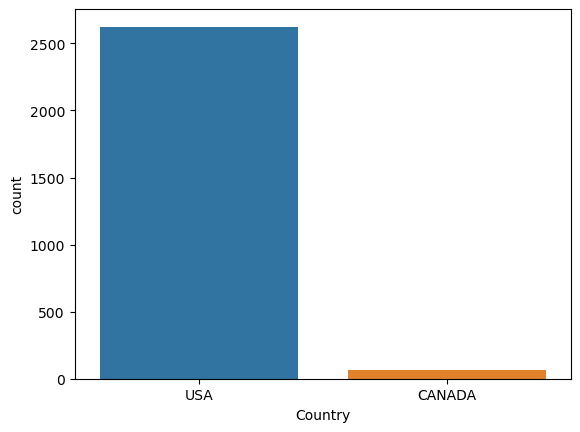

In [79]:
sns.countplot(x=df['Country'])

# Creating models

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

models = [DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]
model_names = ['Decision Tree', 'Random Forest', 'K-Nearest Neighbors']
x = df[['lat','lng']]  # Independent variable(s) as a DataFrame
y = df['Shape']  # 'State' as the dependent variable

# Perform one-hot encoding for categorical variable 'month'
encoder = OneHotEncoder()
x_encoded = encoder.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

for i in range(len(models)):
    model = models[i]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(model_names[i])
    print("Accuracy: {:.2f}".format(accuracy))


Decision Tree
Accuracy: 0.20
Random Forest
Accuracy: 0.19
K-Nearest Neighbors
Accuracy: 0.15


c:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [81]:
# Using Decision Tree Classifier
model = DecisionTreeClassifier()
x = df[['lat','lng']]
y = df['Shape']
encoder = OneHotEncoder()
x_encoded = encoder.fit_transform(x)
model.fit(x, y)
pred=model.predict([[45,-9]])
print(pred)

['Light']


c:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Exporting the data

In [82]:
# exporting the dataset
df.to_csv('UFO_datasett.csv', index=False)

In [83]:
# Exporting the model
import pickle
pickle.dump(model, open('ufo_model.pkl', 'wb'))